In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
classes={'N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/My Drive/mitbih_train.csv',header=None,index_col=False)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


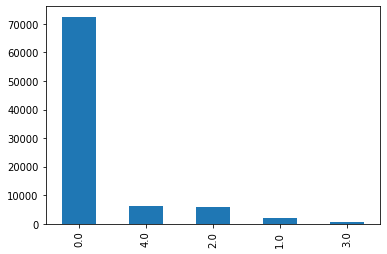

In [ ]:
data[187].value_counts().plot(kind='bar')
plt.show()

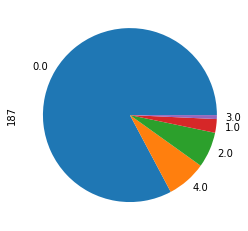

In [ ]:
data[187].value_counts().plot(kind='pie')
plt.show()

In [ ]:
X_train=data.iloc[:,:-1]
y_train=data.iloc[:,-1]

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 187, dtype: float64

In [ ]:
X_train.iloc[0,:]

0      0.977941
1      0.926471
2      0.681373
3      0.245098
4      0.154412
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 0, Length: 187, dtype: float64

In [ ]:
y_train[0]

0.0

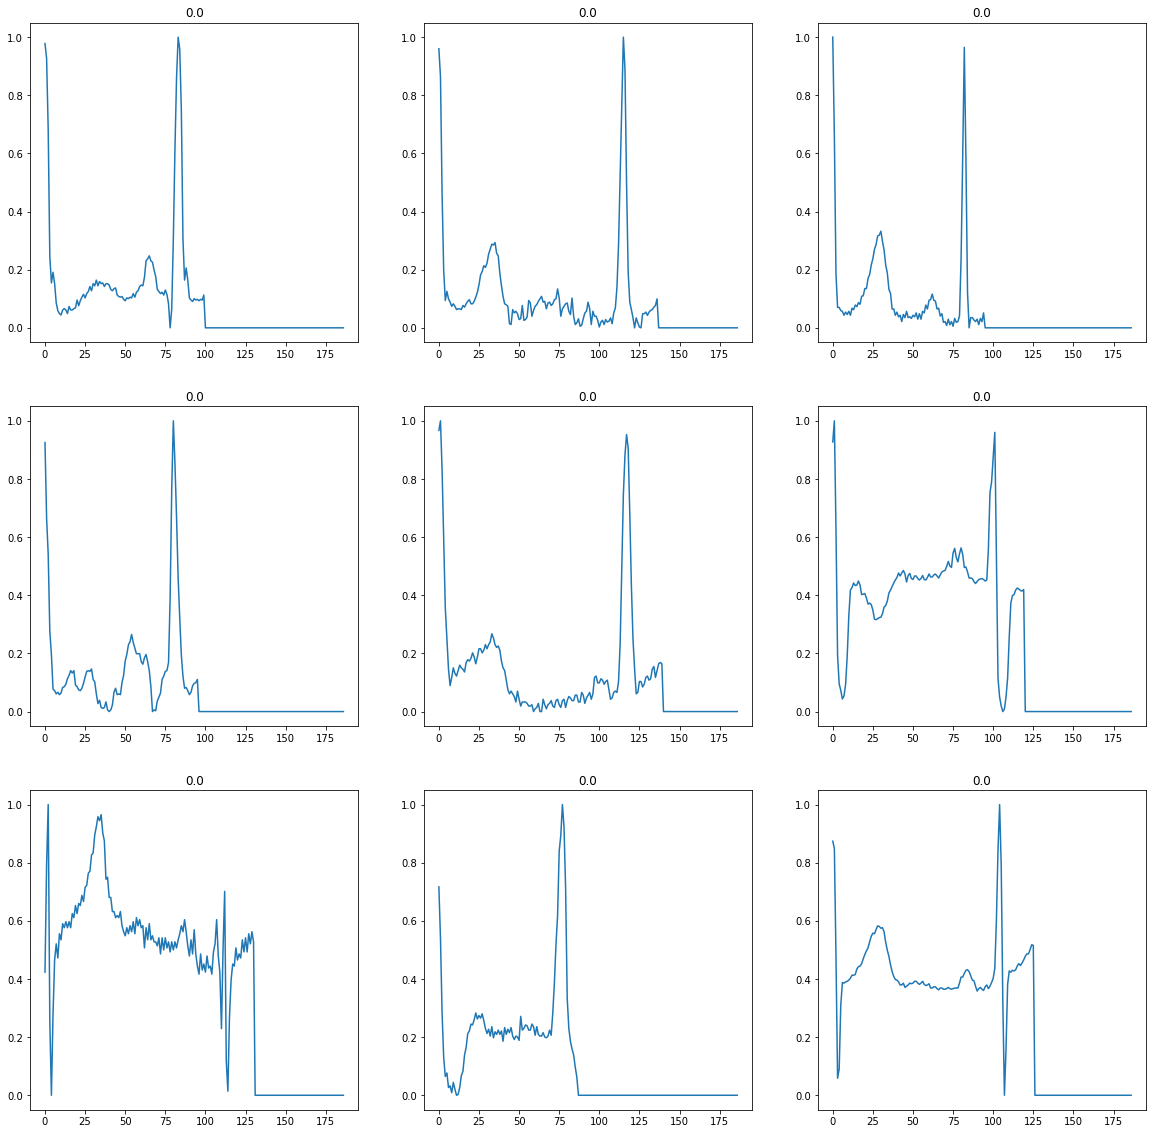

In [ ]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.plot(np.arange(0,187),X_train.iloc[i,:])
    plt.title(y_train[i])
plt.show()

In [ ]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
X_train.shape

(70043, 187)

In [ ]:
y_train.shape

(70043,)

In [ ]:
X_test.shape

(17511, 187)

In [ ]:
y_test.shape

(17511,)

In [ ]:
X_test,X_val,y_test,y_val =train_test_split(X_test,y_test,test_size=0.5)

In [ ]:
X_test.shape,X_val.shape

((8755, 187), (8756, 187))

In [ ]:
y_test.shape,y_val.shape

((8755,), (8756,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [ ]:
earlyStopping=EarlyStopping(patience=100,mode='max',monitor='val_loss',restore_best_weights=True)
reduceLR=ReduceLROnPlateau(monitor='val_loss',min_lr=0.0001)
modelCheck=ModelCheckpoint(filepath='model.h5',monitor='val_loss',save_best_only=True)
callbacks=[earlyStopping,reduceLR,modelCheck]

In [ ]:
model=Sequential([
                    Dense(256,activation='relu',input_shape=(187,)),
                    BatchNormalization(),

                    Dense(512,activation='relu'),
                    BatchNormalization(),

                    Dense(256,activation='relu'),
                    BatchNormalization(),

                    Dense(5,activation='softmax')
                 ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               48128     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1

In [ ]:
model.compile(optimizer='adadelta',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=128,
                 callbacks=callbacks
                 )

Epoch 1/100
548/548 [==============================] - 7s 11ms/step - loss: 2.0405 - accuracy: 0.2037 - val_loss: 1.7929 - val_accuracy: 0.2505 - lr: 0.0010
Epoch 2/100
548/548 [==============================] - 6s 11ms/step - loss: 1.6778 - accuracy: 0.3509 - val_loss: 1.5455 - val_accuracy: 0.4234 - lr: 0.0010
Epoch 3/100
548/548 [==============================] - 6s 11ms/step - loss: 1.4600 - accuracy: 0.4701 - val_loss: 1.3462 - val_accuracy: 0.5363 - lr: 0.0010
Epoch 4/100
548/548 [==============================] - 6s 11ms/step - loss: 1.2948 - accuracy: 0.5669 - val_loss: 1.1928 - val_accuracy: 0.6264 - lr: 0.0010
Epoch 5/100
548/548 [==============================] - 6s 11ms/step - loss: 1.1670 - accuracy: 0.6435 - val_loss: 1.0979 - val_accuracy: 0.6831 - lr: 0.0010
Epoch 6/100
548/548 [==============================] - 6s 11ms/step - loss: 1.0601 - accuracy: 0.7034 - val_loss: 0.9776 - val_accuracy: 0.7452 - lr: 0.0010
Epoch 7/100
548/548 [==============================] - 6s 

In [ ]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

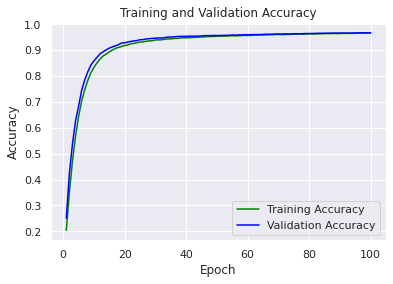

In [ ]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

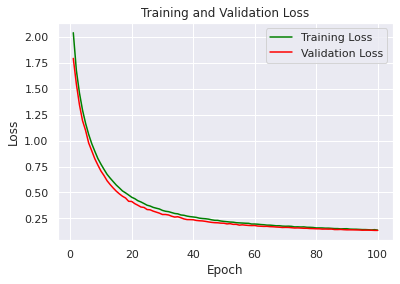

In [ ]:
plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

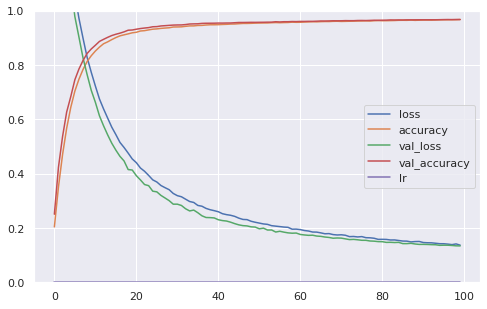

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

274/274 [==============================] - 1s 2ms/step - loss: 0.1395 - accuracy: 0.9660


[0.13948866724967957, 0.965962290763855]

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      7248
         1.0       0.95      0.67      0.79       243
         2.0       0.90      0.85      0.87       583
         3.0       0.70      0.57      0.63        61
         4.0       0.97      0.93      0.95       620

    accuracy                           0.97      8755
   macro avg       0.90      0.80      0.84      8755
weighted avg       0.97      0.97      0.96      8755



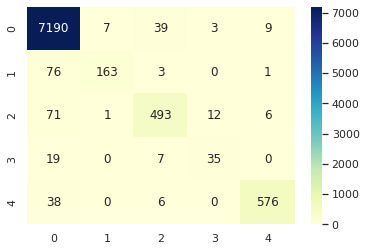

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions.argmax(axis=1))

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")